In [388]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [389]:
df = pd.read_csv(r"D:\AIML_PROGRAM\ML\loan_data.csv")

In [390]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


<Axes: xlabel='Credit_History', ylabel='count'>

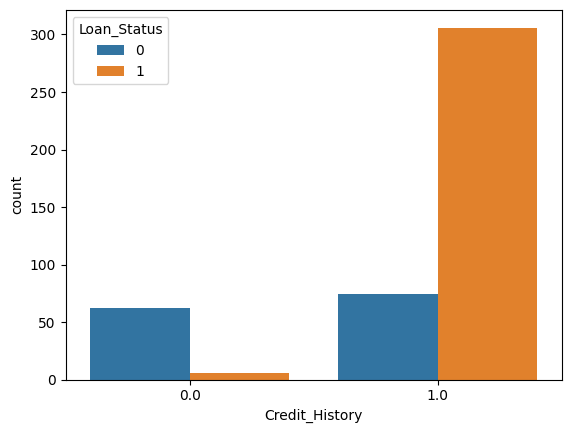

In [391]:
sb.countplot(data=df,x='Credit_History',hue="Loan_Status")

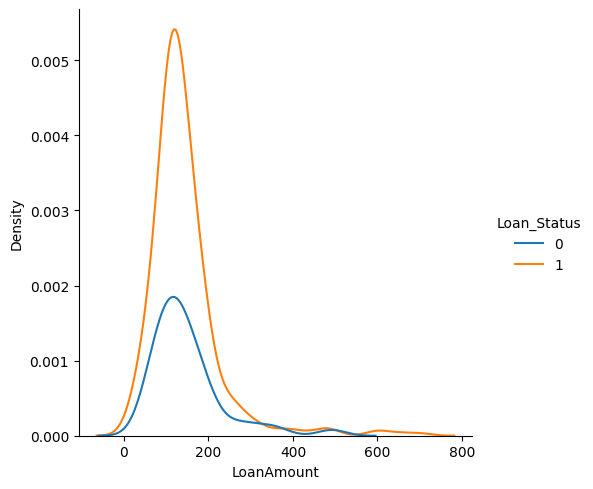

In [392]:
sb.displot(df, x = "LoanAmount",hue= "Loan_Status",kind='kde')

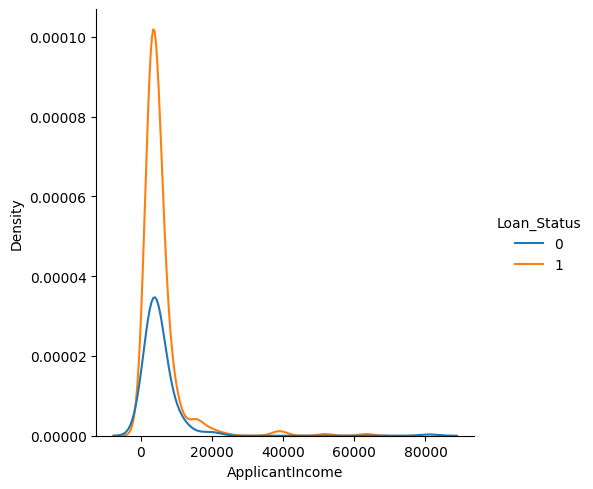

In [393]:
sb.displot(df, x = "ApplicantIncome",hue= "Loan_Status",kind='kde')

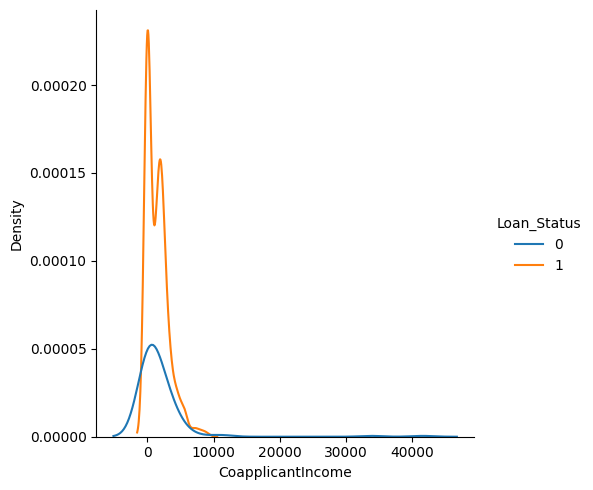

In [394]:
sb.displot(df, x = "CoapplicantIncome",hue= "Loan_Status",kind='kde')

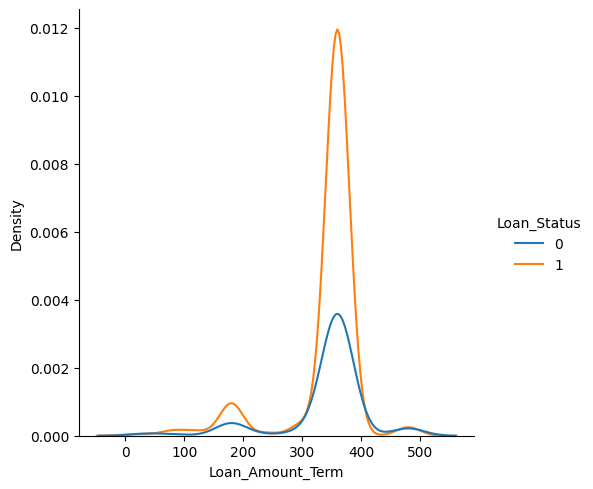

In [395]:
sb.displot(df, x = "Loan_Amount_Term",hue= "Loan_Status",kind='kde')

In [396]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [397]:
x = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History']]
y = df[['Loan_Status']]

In [398]:
x.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Credit_History       43
dtype: int64

In [399]:
x.shape

(491, 4)

<Axes: ylabel='LoanAmount'>

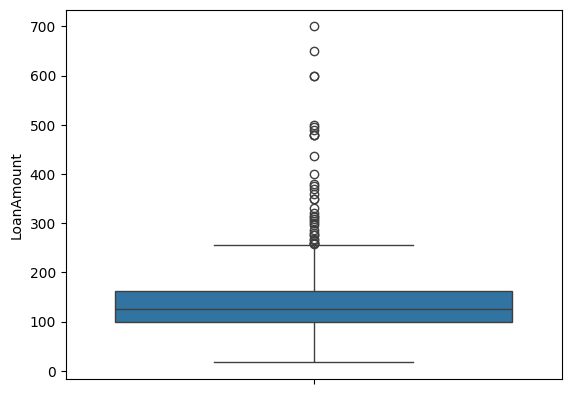

In [400]:
sb.boxplot(df['LoanAmount'])

In [401]:
med = x["LoanAmount"].median()

In [402]:
x["LoanAmount"] = x["LoanAmount"].fillna(med)

C:\Users\Precision 7520\AppData\Local\Temp\ipykernel_9412\900846701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["LoanAmount"] = x["LoanAmount"].fillna(med)


In [403]:
mod = x["Credit_History"].mode()[0]
x["Credit_History"] = x["Credit_History"].fillna(mod)

C:\Users\Precision 7520\AppData\Local\Temp\ipykernel_9412\933900674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Credit_History"] = x["Credit_History"].fillna(mod)


In [404]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [405]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [406]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.2,random_state=2,stratify=y)

In [407]:




from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [408]:
lr = LogisticRegression()


In [409]:
lr.fit(x_train,y_train)

d:\miniconda\envs\gtf\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [410]:
y.value_counts()

Loan_Status
1              343
0              148
Name: count, dtype: int64

In [411]:
y_pred = lr.predict(x_test)

In [412]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix,classification_report

In [413]:
accuracy_score(y_test,y_pred)

0.8282828282828283

In [414]:
cm = confusion_matrix(y_test,y_pred)

In [415]:
cm

array([[14, 16],
       [ 1, 68]], dtype=int64)

In [416]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

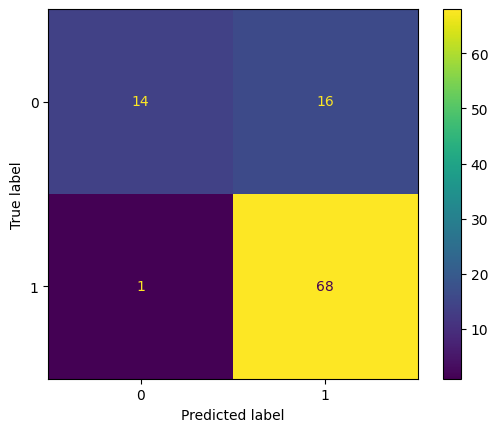

In [417]:
disp.plot()

In [418]:
pred = classification_report(y_test,y_pred)

In [419]:
print(pred)

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.81      0.99      0.89        69

    accuracy                           0.83        99
   macro avg       0.87      0.73      0.76        99
weighted avg       0.85      0.83      0.81        99



In [420]:
dtc = DecisionTreeClassifier(random_state=1,max_depth=3)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [421]:
dtc.score(x_test,y_test)

0.7878787878787878

In [422]:
dtc.score(x_train,y_train)

0.8239795918367347

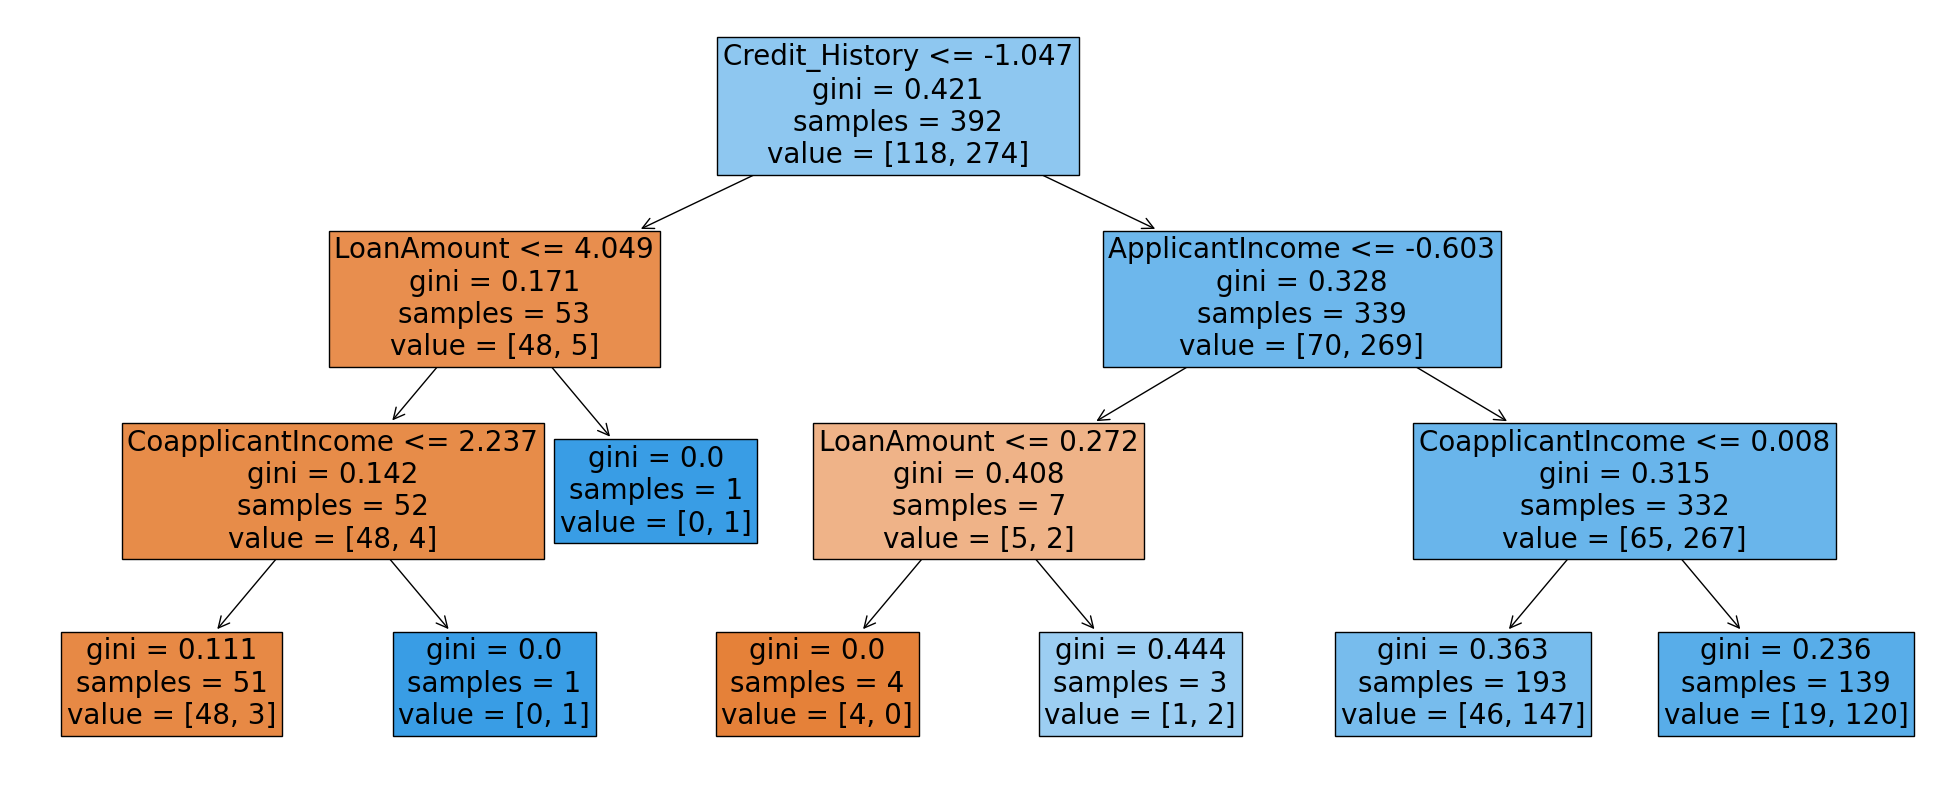

In [423]:
plt.figure(figsize=(25,10))
ree = plot_tree(dtc, feature_names= list(x.columns),filled = True,fontsize=20)

In [424]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,4547,0.0,115.0,1.0
1,5703,0.0,130.0,1.0
2,4333,2451.0,110.0,1.0
3,4695,0.0,96.0,1.0
4,6700,1750.0,230.0,1.0
...,...,...,...,...
486,9833,1833.0,182.0,1.0
487,3812,0.0,112.0,1.0
488,14583,0.0,185.0,1.0
489,1836,33837.0,90.0,1.0


In [425]:
x = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History','Self_Employed',"Loan_Amount_Term"]]
y = df[['Loan_Status']]

In [426]:
med = x['LoanAmount'].median()
x['LoanAmount'] = x['LoanAmount'].fillna(med)

mod = x['Credit_History'].mode()[0]
x['Credit_History'] = x['Credit_History'].fillna(mod)

med = x['Loan_Amount_Term'].median()
x['Loan_Amount_Term'] = x['Loan_Amount_Term'].fillna(med)

mod = x['Self_Employed'].mode()[0]
x['Self_Employed'] = x['Self_Employed'].fillna(mod)


C:\Users\Precision 7520\AppData\Local\Temp\ipykernel_9412\127159942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['LoanAmount'] = x['LoanAmount'].fillna(med)
C:\Users\Precision 7520\AppData\Local\Temp\ipykernel_9412\127159942.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Credit_History'] = x['Credit_History'].fillna(mod)
C:\Users\Precision 7520\AppData\Local\Temp\ipykernel_9412\127159942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [427]:
from sklearn.preprocessing import LabelEncoder

In [428]:
le = LabelEncoder()
x['Self_Employed'] = le.fit_transform(x['Self_Employed'])

C:\Users\Precision 7520\AppData\Local\Temp\ipykernel_9412\2533052915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['Self_Employed'] = le.fit_transform(x['Self_Employed'])


In [429]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Self_Employed,Loan_Amount_Term
0,4547,0.0,115.0,1.0,0,360.0
1,5703,0.0,130.0,1.0,1,360.0
2,4333,2451.0,110.0,1.0,0,360.0
3,4695,0.0,96.0,1.0,1,360.0
4,6700,1750.0,230.0,1.0,0,300.0
...,...,...,...,...,...,...
486,9833,1833.0,182.0,1.0,1,180.0
487,3812,0.0,112.0,1.0,0,360.0
488,14583,0.0,185.0,1.0,0,180.0
489,1836,33837.0,90.0,1.0,0,360.0


In [430]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [431]:

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.2,random_state=2,stratify=y)

In [432]:
lr.fit(x_train,y_train)

d:\miniconda\envs\gtf\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [433]:
y_pred = lr.predict(x_test)

In [434]:
accuracy_score(y_pred,y_test)

0.8282828282828283

In [435]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.81      0.99      0.89        69

    accuracy                           0.83        99
   macro avg       0.87      0.73      0.76        99
weighted avg       0.85      0.83      0.81        99



In [436]:
x = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Credit_History']]
y = df[['Loan_Status']]

In [437]:
x.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Credit_History       43
dtype: int64

In [438]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer,IterativeImputer

In [439]:
knn_imputer = KNNImputer(n_neighbors=5,weights='distance')
x_new = knn_imputer.fit_transform(x)

In [440]:
x_new[:,-1]

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.        , 1.        , 0.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 0.841927  ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.81983813, 1.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.84523

In [441]:
x_df = pd.DataFrame(data=x_new,columns=x.columns,index = x.index)

In [442]:
x_df.head(30)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
0,4547.0,0.0,115.0,1.000000
1,5703.0,0.0,130.0,1.000000
2,4333.0,2451.0,110.0,1.000000
3,4695.0,0.0,96.0,1.000000
4,6700.0,1750.0,230.0,1.000000
5,4344.0,736.0,87.0,1.000000
6,6000.0,2250.0,265.0,1.000000
7,5285.0,1430.0,161.0,0.000000
8,14683.0,2100.0,304.0,1.000000
9,3200.0,2254.0,126.0,0.000000


In [443]:
x_df['Credit_History'] = x_df['Credit_History'].apply(lambda x: 1 if x>=0.65  else 0)

In [444]:
x_df['Credit_History'].unique()

array([1, 0], dtype=int64)

In [445]:
sc = StandardScaler()

In [446]:
x_scaled = sc.fit_transform(x_df)

In [447]:

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.2,random_state=2,stratify=y)

In [448]:
lr = LogisticRegression()

In [449]:
lr.fit(x_train,y_train)

d:\miniconda\envs\gtf\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [450]:
y_pred = lr.predict(x_test)

In [451]:
accuracy_score(y_test,y_pred)

0.8383838383838383

In [452]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.50      0.65        30
           1       0.82      0.99      0.89        69

    accuracy                           0.84        99
   macro avg       0.88      0.74      0.77        99
weighted avg       0.86      0.84      0.82        99



using iterative imputer

In [453]:
x.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Credit_History       43
dtype: int64

In [454]:
x_num = x.drop('Credit_History',axis=1)

In [455]:
x_cat = x['Credit_History']

In [456]:
it_num = IterativeImputer(initial_strategy='mean')

In [457]:
x_num_new = it_num.fit_transform(x_num)

In [458]:
x_num_df = pd.DataFrame(data=x_num_new,columns=x_num.columns,index = x_num.index)

In [459]:
x_df = pd.concat([x_num_df,x_cat],axis=1)
x_df.isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       43
dtype: int64

In [460]:
it_cat = IterativeImputer(initial_strategy='most_frequent')
x_df_new = it_num.fit_transform(x_df)

In [461]:
sc = StandardScaler()
x_scaled = sc.fit_transform(x_df_new)

In [462]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size= 0.2,random_state=2,stratify=y)

In [463]:
lr.fit(x_train,y_train)

d:\miniconda\envs\gtf\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [464]:
y_pred = lr.predict(x_test)

In [465]:
accuracy_score(y_test,y_pred)

0.8282828282828283

In [466]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.81      0.99      0.89        69

    accuracy                           0.83        99
   macro avg       0.87      0.73      0.76        99
weighted avg       0.85      0.83      0.81        99



In [467]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [468]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
486,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
487,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
488,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
489,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


In [469]:
df['Property_Area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

In [470]:
prop_oe = OrdinalEncoder(categories=[["Rural","Semiurban","Urban"]],handle_unknown="use_encoded_value",unknown_value=-1)

In [471]:
df['Property_Area'] = prop_oe.fit_transform(df[['Property_Area']])

In [472]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,1.0,1
1,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,0.0,1
2,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,2.0,0
3,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,2.0,1
4,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
486,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,2.0,1
487,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,0.0,1
488,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,0.0,1
489,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,2.0,0


Handling Outliers

you can use mathematical transformations

In [473]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [474]:
df = pd.read_csv(r"D:\AIML_PROGRAM\ML\diamonds.csv")

In [475]:
df.head()

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,F,VS1,4,1749
1,2,2.25,Fair,1,G,I1,1,7069
2,3,0.70,Very Good,3,E,VS2,5,2757
3,4,0.47,Good,2,F,VS1,4,1243
4,5,0.30,Ideal,5,G,VVS1,7,789


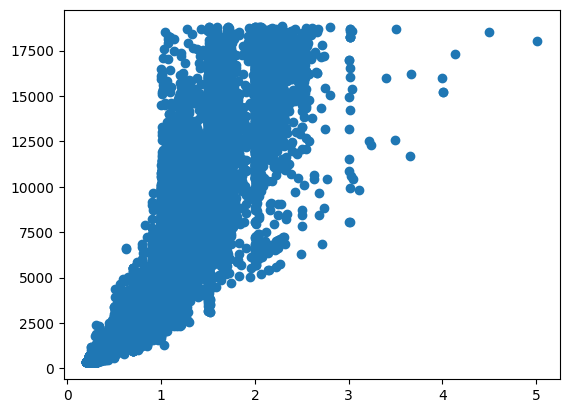

In [476]:
plt.scatter(df["carat"],df['price'])

<Axes: ylabel='carat'>

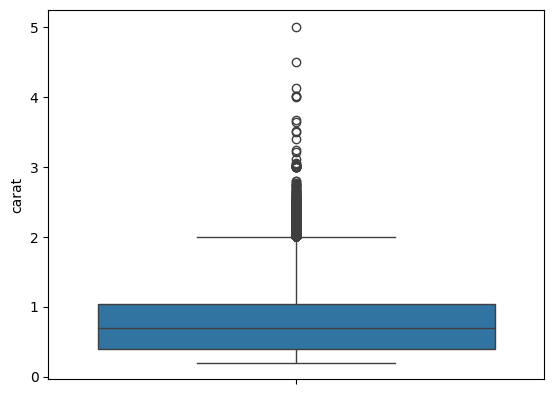

In [477]:
sns.boxplot(df['carat'])

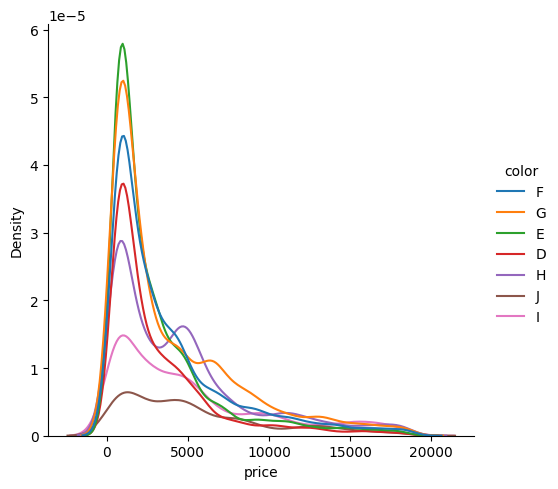

In [478]:
sns.displot(data=df,x=df['price'],hue='color',kind = 'kde')

In [479]:
x= df.iloc[:,[1,3,6]]
y = df.price

In [480]:
x

,carat,cut_ord,clarity_ord
0,0.51,4,4
1,2.25,1,1
2,0.70,3,5
3,0.47,2,4
4,0.30,5,7
...,...,...,...
49995,0.71,5,7
49996,0.43,5,6
49997,1.14,4,5
49998,1.01,4,5


In [481]:
#DEF - 0
#GHIJ - 1

In [482]:
def encode_colour (c):
    if(c in 'DEF'):
        return 0
    elif (c in 'GHIJ'):
        return 1
    else:
        return -1

In [483]:
df['color'] = df['color'].apply(encode_colour)

In [484]:
df

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,0,VS1,4,1749
1,2,2.25,Fair,1,1,I1,1,7069
2,3,0.70,Very Good,3,0,VS2,5,2757
3,4,0.47,Good,2,0,VS1,4,1243
4,5,0.30,Ideal,5,1,VVS1,7,789
...,...,...,...,...,...,...,...,...
49995,49996,0.71,Ideal,5,1,VVS1,7,2918
49996,49997,0.43,Ideal,5,1,VVS2,6,1056
49997,49998,1.14,Premium,4,1,VS2,5,6619
49998,49999,1.01,Premium,4,0,VS2,5,6787


In [485]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [486]:
from sklearn.linear_model import LinearRegression

In [487]:
lr = LinearRegression()

In [488]:
lr.fit(x_train,y_train)

LinearRegression()

In [489]:
lr.score(x_test,y_test)

0.8864233038745791

In [490]:
import numpy as np

In [491]:
y_trans = np.log(y)

In [492]:
y_trans

0        7.466799
1        8.863474
2        7.921898
3        7.125283
4        6.670766
           ...   
49995    7.978654
49996    6.962243
49997    8.797700
49998    8.822764
49999    9.151439
Name: price, Length: 50000, dtype: float64

<Axes: ylabel='price'>

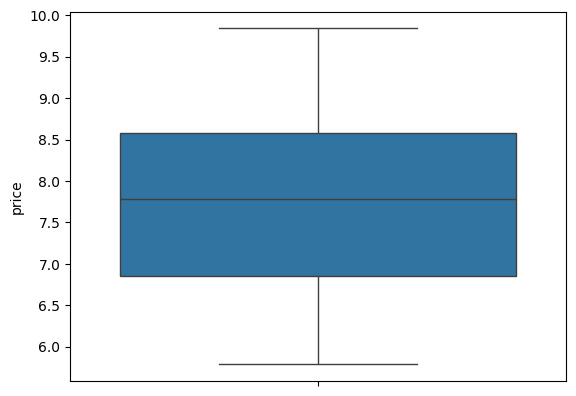

In [493]:
sns.boxplot(y_trans)

In [494]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2)

In [495]:
y_train_trans = np.log(y_train)

In [496]:
lr.fit(x_train,y_train_trans)

LinearRegression()

In [497]:
y_pred = lr.predict(x_test)

In [498]:
y_pred

array([ 8.36435596,  7.82207442, 10.17484845, ...,  8.6000051 ,
        8.26966592,  7.20766511])

In [499]:
from sklearn.metrics import r2_score 

In [500]:
r2_score(y_test,np.exp(y_pred))

-6.225372717947507

In [501]:
x_train['carat'] = np.log(x_train['carat'])
x_test['carat'] = np.log(x_test['carat'])

In [502]:
lr.fit(x_train,y_train_trans)

LinearRegression()

In [503]:
lr.score(x_test,np.log(y_test))

0.9619735471743163

In [504]:
lr.predict(x_test)

array([8.60924704, 8.12633873, 9.54793873, ..., 8.86087697, 8.59376107,
       7.15738324])

In [505]:
x

,carat,cut_ord,clarity_ord
0,0.51,4,4
1,2.25,1,1
2,0.70,3,5
3,0.47,2,4
4,0.30,5,7
...,...,...,...
49995,0.71,5,7
49996,0.43,5,6
49997,1.14,4,5
49998,1.01,4,5


In [506]:
y

0        1749
1        7069
2        2757
3        1243
4         789
         ... 
49995    2918
49996    1056
49997    6619
49998    6787
49999    9428
Name: price, Length: 50000, dtype: int64

In [507]:
x_t = np.log(x)

In [508]:
y_t = np.log(y)

In [509]:
x_train,x_test,y_train,y_test = train_test_split(x_t,y_t,test_size=0.25,random_state=2)

In [510]:
lr.fit(x_train,y_train)

LinearRegression()

In [511]:
y_pred = lr.predict(x_test)

In [512]:
y_pred

array([8.65771094, 8.15247024, 9.51670861, ..., 8.89333624, 8.62555929,
       7.05257829])

clipping of outliers 

In [513]:
df

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,0,VS1,4,1749
1,2,2.25,Fair,1,1,I1,1,7069
2,3,0.70,Very Good,3,0,VS2,5,2757
3,4,0.47,Good,2,0,VS1,4,1243
4,5,0.30,Ideal,5,1,VVS1,7,789
...,...,...,...,...,...,...,...,...
49995,49996,0.71,Ideal,5,1,VVS1,7,2918
49996,49997,0.43,Ideal,5,1,VVS2,6,1056
49997,49998,1.14,Premium,4,1,VS2,5,6619
49998,49999,1.01,Premium,4,0,VS2,5,6787


In [514]:
y_train

45019    6.749931
2991     6.792344
5805     8.563313
30941    8.280711
37113    6.740519
           ...   
44566    8.532476
30280    6.042633
6637     6.423247
35343    7.351800
23720    7.412160
Name: price, Length: 37500, dtype: float64

<Axes: ylabel='carat'>

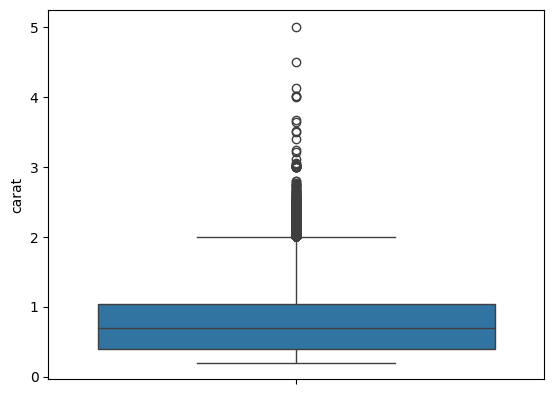

In [515]:
sns.boxplot(x["carat"])

In [516]:
q1 = x_train['carat'].quantile(0.25)

In [517]:
q3 = x_train['carat'].quantile(0.75)

In [518]:
iqr = q3 - q1
ll = q1 - 1.5*iqr
ul = q3 + 1.5*iqr

In [519]:
x_train.loc[x_train['carat']<ll,'carat'] = ll

In [520]:
x_train.loc[x_train['carat']>ul,'carat'] = ul

In [521]:
x_test.loc[x_test['carat']<ll,'carat'] = ll
x_test.loc[x_test['carat']>ul,'carat'] = ul


In [522]:
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9636863983334976

In [523]:
#use huber regressor and ransac regressor on your dataset

In [524]:
df

,Unnamed: 0,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,1,0.51,Premium,4,0,VS1,4,1749
1,2,2.25,Fair,1,1,I1,1,7069
2,3,0.70,Very Good,3,0,VS2,5,2757
3,4,0.47,Good,2,0,VS1,4,1243
4,5,0.30,Ideal,5,1,VVS1,7,789
...,...,...,...,...,...,...,...,...
49995,49996,0.71,Ideal,5,1,VVS1,7,2918
49996,49997,0.43,Ideal,5,1,VVS2,6,1056
49997,49998,1.14,Premium,4,1,VS2,5,6619
49998,49999,1.01,Premium,4,0,VS2,5,6787


In [525]:
u= df.iloc[:,[1,3,6]]
i = df.price

In [526]:
u_train,u_test,i_train,i_test = train_test_split(u,i,test_size=0.2,random_state=2)

In [527]:
u_train

,carat,cut_ord,clarity_ord
5478,0.40,3,4
22132,1.20,1,1
33533,0.73,3,3
42605,0.53,3,5
48740,0.41,5,3
...,...,...,...
44566,1.07,5,2
30280,0.32,3,3
6637,0.37,4,3
35343,0.50,4,5


In [528]:
i_train

5478      818
22132    3011
33533    2473
42605    1122
48740    1015
         ... 
44566    5077
30280     421
6637      616
35343    1559
23720    1656
Name: price, Length: 40000, dtype: int64

In [529]:
from sklearn.linear_model import HuberRegressor,RANSACRegressor

In [530]:
hr = HuberRegressor()

In [531]:
hr.fit(u_train,i_train)

HuberRegressor()

In [532]:
u_pred = hr.predict(u_test)

In [533]:
hr.score(u_test,i_test)

0.8761580987815428

In [534]:
rr = RANSACRegressor()

In [535]:
rr.fit(u_train,i_train)

RANSACRegressor()

In [536]:
rr.score(u_test,i_test)

0.8425184032545825

HANDLING CLASS IMBALANCE

In [537]:
import pandas as pd

In [538]:
import numpy as np
import seaborn as sns

In [539]:
df = pd.read_csv(r"D:\AIML_PROGRAM\ML\Liver_disease.csv")

In [540]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [541]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Problem'],
      dtype='object')

In [542]:
df["Liver_Problem"].value_counts()

Liver_Problem
1    350
2    150
Name: count, dtype: int64

In [543]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Liver_Problem                 0
dtype: int64

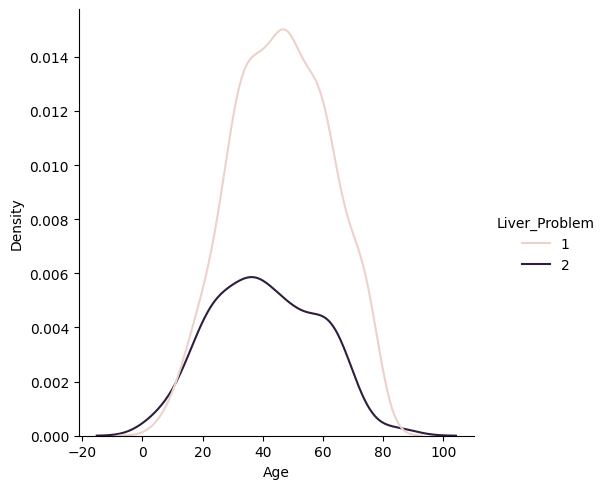

In [544]:
sns.displot(df, x='Age',hue='Liver_Problem',kind='kde')

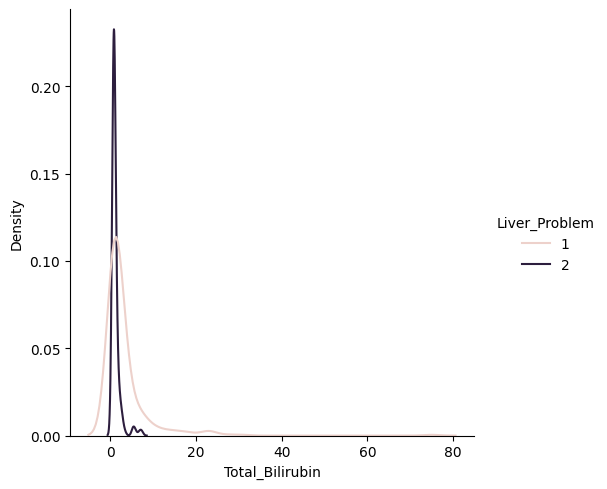

In [545]:
sns.displot(df, x='Total_Bilirubin',hue='Liver_Problem',kind='kde')

<Axes: xlabel='Gender', ylabel='count'>

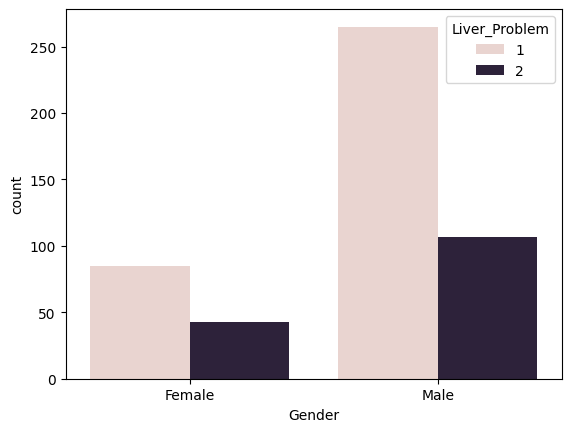

In [546]:
sns.countplot(df,x='Gender',hue="Liver_Problem")

In [547]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Liver_Problem'],
      dtype='object')

In [548]:
x = df[['Direct_Bilirubin','Aspartate_Aminotransferase','Alkaline_Phosphotase','Total_Protiens']]
y = df['Liver_Problem']

In [549]:
x

,Direct_Bilirubin,Aspartate_Aminotransferase,Alkaline_Phosphotase,Total_Protiens
0,0.1,18,187,6.8
1,5.5,100,699,7.5
2,4.1,68,490,7.0
3,0.4,20,182,6.8
4,2.0,59,195,7.3
...,...,...,...,...
495,0.2,29,165,6.1
496,0.2,31,189,8.0
497,1.1,39,198,7.2
498,0.5,22,151,6.5


In [550]:
x.isnull().sum()

Direct_Bilirubin              0
Aspartate_Aminotransferase    0
Alkaline_Phosphotase          0
Total_Protiens                0
dtype: int64

In [551]:
y.isnull().sum()

0

In [552]:
from sklearn.model_selection import train_test_split

In [553]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=41,stratify=y)

In [554]:
y_train.value_counts()

Liver_Problem
1    297
2    128
Name: count, dtype: int64

In [555]:
from sklearn.linear_model import LogisticRegression

In [556]:
lr = LogisticRegression(random_state=21,class_weight="balanced")

In [557]:
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=21)

In [558]:
lr.score(x_test,y_test)

0.4666666666666667

In [559]:
from sklearn.metrics import classification_report,confusion_matrix

In [560]:
y_pred = lr.predict(x_test)

In [561]:
confusion_matrix(y_test,y_pred)

array([[21, 32],
       [ 8, 14]], dtype=int64)

In [562]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.72      0.40      0.51        53
           2       0.30      0.64      0.41        22

    accuracy                           0.47        75
   macro avg       0.51      0.52      0.46        75
weighted avg       0.60      0.47      0.48        75



In [563]:
from imblearn.over_sampling import SMOTE,KMeansSMOTE,SVMSMOTE

In [564]:
sampler = SMOTE(sampling_strategy=0.6, random_state=2)

In [565]:
x_resampled,y_resampled = sm.fit_resample(x_train,y_train)

NameError: name 'sm' is not defined

In [ ]:
x_resampled

,Direct_Bilirubin,Aspartate_Aminotransferase,Alkaline_Phosphotase,Total_Protiens
0,1.500000,67,292,5.600000
1,0.200000,25,180,8.200000
2,0.100000,27,178,6.500000
3,0.200000,58,180,6.700000
4,0.600000,602,298,6.600000
...,...,...,...,...
589,0.616223,23,146,6.209734
590,0.161913,37,145,7.415828
591,0.874063,25,177,8.148126
592,0.234815,23,145,5.786663


In [ ]:
y_resampled

0      1
1      2
2      2
3      2
4      1
      ..
589    2
590    2
591    2
592    2
593    2
Name: Liver_Problem, Length: 594, dtype: int64

In [ ]:
y_train.value_counts()

Liver_Problem
1    297
2    128
Name: count, dtype: int64

In [ ]:
y_resampled.value_counts()

Liver_Problem
1    297
2    297
Name: count, dtype: int64

In [ ]:
lr = LogisticRegression(random_state=21)

In [ ]:
lr.fit(x_resampled,y_resampled)

LogisticRegression(random_state=21)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
lr.score(x_test,y_test)

0.44

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.66      0.43      0.52        53
           2       0.25      0.45      0.32        22

    accuracy                           0.44        75
   macro avg       0.45      0.44      0.42        75
weighted avg       0.54      0.44      0.46        75



In [ ]:
confusion_matrix(y_test,y_pred)

array([[23, 30],
       [12, 10]], dtype=int64)

In [ ]:
sm = SVMSMOTE(random_state=42)

handling imbalance using stacking of resampled dataset

In [ ]:
x_train['Liver_Problem']=y_train
majority = x_train[x_train['Liver_Problem']==1]
minority = x_train[x_train['Liver_Problem']==2]

In [ ]:
minority.shape

(128, 5)

In [ ]:
majority.shape

(297, 5)

In [ ]:
#iloc is position loc is index

In [ ]:
chk1 = majority.iloc[:120,:]
chk2 = majority.iloc[100:220,:]
chk3 = majority.iloc[177:,:]

In [ ]:
chk1

,Direct_Bilirubin,Aspartate_Aminotransferase,Alkaline_Phosphotase,Total_Protiens,Liver_Problem
167,1.5,67,292,5.6,1
171,0.6,602,298,6.6,1
302,0.6,32,430,6.8,1
375,1.6,31,206,6.8,1
174,0.1,34,175,6.0,1
...,...,...,...,...,...
463,0.1,42,130,8.0,1
142,0.4,139,332,5.6,1
2,4.1,68,490,7.0,1
51,0.1,19,161,6.6,1


In [ ]:
chk1 = pd.concat([chk1,minority],axis = 0)
chk2 = pd.concat([chk2,minority],axis = 0)
chk3 = pd.concat([chk3,minority],axis = 0)


In [ ]:
chk3.shape

(248, 5)

In [ ]:
x1 = chk1.drop('Liver_Problem', axis=1)
y1 = chk1['Liver_Problem']

In [ ]:
lr.fit(x1,y1)
y_pred1 = lr.predict(x_test)

In [ ]:
x2 = chk1.drop('Liver_Problem', axis=1)
y2 = chk1['Liver_Problem']

In [ ]:
lr.fit(x2,y2)
y_pred2 = lr.predict(x_test)

In [ ]:
x3 = chk1.drop('Liver_Problem', axis=1)
y3 = chk1['Liver_Problem']

In [ ]:
lr.fit(x3,y3)
y_pred3 = lr.predict(x_test)

In [ ]:
y_pred1

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [ ]:
y_pred2

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [ ]:
y_pred3

array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [ ]:
predictions = pd.DataFrame(data = [y_pred1,y_pred2,y_pred3]).T
predictions.columns = ['y_pred1','y_pred2','y_pred3']
predictions['final_pred'] = predictions.mode(axis=1)
predictions

,y_pred1,y_pred2,y_pred3,final_pred
0,2,2,2,2
1,2,2,2,2
2,1,1,1,1
3,2,2,2,2
4,2,2,2,2
...,...,...,...,...
70,2,2,2,2
71,1,1,1,1
72,2,2,2,2
73,2,2,2,2


In [ ]:
print(classification_report(y_test,predictions['final_pred']))

              precision    recall  f1-score   support

           1       0.76      0.42      0.54        53
           2       0.33      0.68      0.44        22

    accuracy                           0.49        75
   macro avg       0.54      0.55      0.49        75
weighted avg       0.63      0.49      0.51        75



In [ ]:
accuracy_score(y_test,predictions['final_pred'])

0.49333333333333335

using non linear models on the liver disease dataset

In [ ]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Problem
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
495,32,Male,0.7,0.2,165,31,29,6.1,3.0,0.96,2
496,24,Male,1.0,0.2,189,52,31,8.0,4.8,1.50,1
497,67,Male,2.2,1.1,198,42,39,7.2,3.0,0.70,1
498,68,Male,1.8,0.5,151,18,22,6.5,4.0,1.60,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
a = df.drop("Liver_Problem",axis=1)

In [ ]:
b = df['Liver_Problem']

In [ ]:
b

0      1
1      1
2      1
3      1
4      1
      ..
495    2
496    1
497    1
498    1
499    1
Name: Liver_Problem, Length: 500, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
a_scaled = sc.fit_transform(a)

In [ ]:
a_train,a_test,b_train,b_test = train_test_split(a_scaled,b,random_state=21,stratify=b)

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier()
model.fit(a_train,b_train)
y_pred = model.predict(a_test)

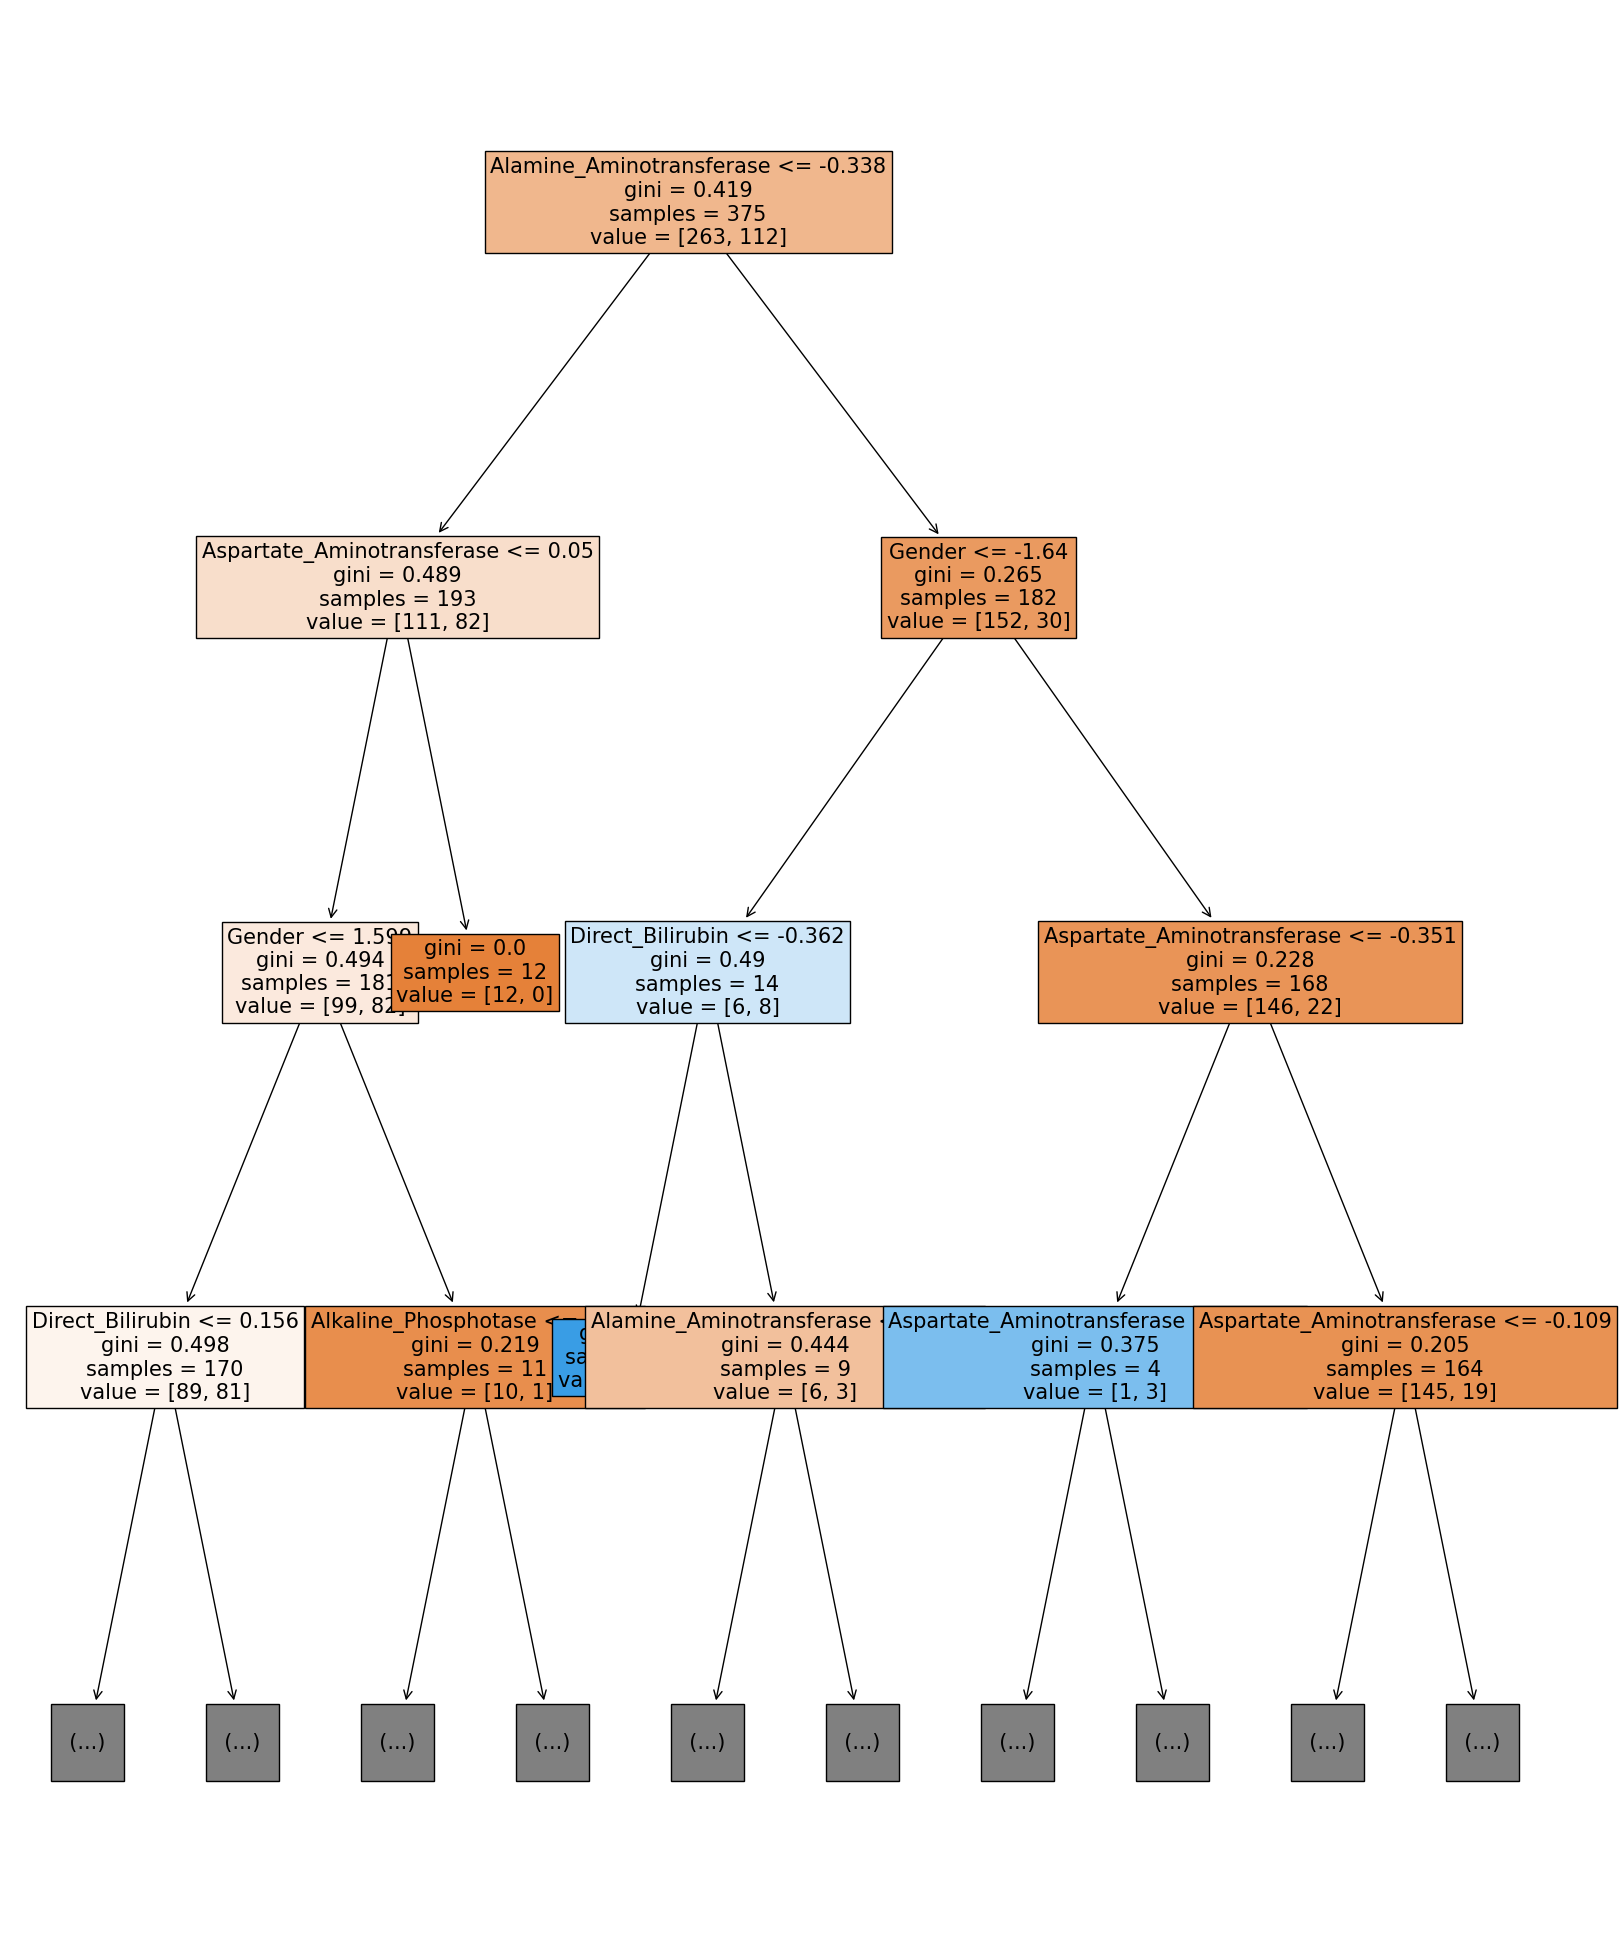

In [ ]:
fig = plt.figure(figsize=(20,25))
tree_diagram = plot_tree(model,max_depth=3, feature_names=df.columns[1:],filled=True,fontsize=15)

In [ ]:
accuracy_score(b_test, y_pred)

0.664

In [ ]:
print(classification_report(b_test,y_pred))

              precision    recall  f1-score   support

           1       0.74      0.80      0.77        87
           2       0.43      0.34      0.38        38

    accuracy                           0.66       125
   macro avg       0.59      0.57      0.58       125
weighted avg       0.64      0.66      0.65       125



In [ ]:
print ()

Ensemble Techniques

In [37]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv(r"D:\Downloads\kyphosis.csv")

In [ ]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.isnull().sum()


Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [ ]:
x  = df.drop('Kyphosis',axis=1)

In [ ]:
y = df['Kyphosis']

In [ ]:
le = LabelEncoder()

In [ ]:
y = le.fit_transform(y)

In [ ]:
y

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2,stratify=y)

In [ ]:
lr = LogisticRegression(random_state=1)
dtc = DecisionTreeClassifier(random_state=1,max_depth=5)
knn = KNeighborsClassifier()

In [ ]:
vc = VotingClassifier(estimators=[('logistic',lr),
                                  ('tree',dtc),
                                  ('neigbour',knn)])

In [ ]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression(random_state=1)),
                             ('tree',
                              DecisionTreeClassifier(max_depth=5,
                                                     random_state=1)),
                             ('neigbour', KNeighborsClassifier())])

In [ ]:
vc.score(x_test,y_test)

0.8888888888888888

In [ ]:
le.inverse_transform(vc.predict(x_test))

array(['absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent'], dtype=object)

In [ ]:
RandomForestClassifier?

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_co

In [ ]:
rfc = RandomForestClassifier(n_estimators=21,random_state=1,max_depth=5)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=21, random_state=1)

In [ ]:
rfc.score(x_test,y_test)

0.7777777777777778

In [ ]:
df['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [ ]:
print(classification_report(y_test,rfc.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.50      1.00      0.67         2

    accuracy                           0.78         9
   macro avg       0.75      0.86      0.75         9
weighted avg       0.89      0.78      0.80         9



Bagging classifier

In [ ]:
bc = BaggingClassifier(estimator=SVC(),n_estimators=11,random_state=0)
bc.fit(x_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=11, random_state=0)

In [ ]:
bc.score(x_test,y_test)

0.7777777777777778

In [ ]:
vc.named_estimators_['tree'].predict(x_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [ ]:
vc.named_estimators_['logistic'].score(x_test,y_test)

0.8888888888888888

In [ ]:
print(classification_report(y_test,vc.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.50      0.67         2

    accuracy                           0.89         9
   macro avg       0.94      0.75      0.80         9
weighted avg       0.90      0.89      0.87         9



using adaboost classifier

In [ ]:
ac = AdaBoostClassifier(n_estimators=21, algorithm="SAMME", random_state=0)

In [ ]:
ac.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=21, random_state=0)

In [ ]:
ac.score(x_test,y_test)

0.8888888888888888

In [ ]:
print(classification_report(y_test,ac.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.67      1.00      0.80         2

    accuracy                           0.89         9
   macro avg       0.83      0.93      0.86         9
weighted avg       0.93      0.89      0.90         9



Feature Selection

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest,RFE,mutual_info_classif
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
dicti = load_breast_cancer(as_frame=True)
x = dicti['data']
y = dicti['target']

In [ ]:
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=12,stratify=y)

In [ ]:
sc = StandardScaler()

In [ ]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [ ]:
x_train_scaled

array([[-1.25518619, -0.1830615 , -1.23973935, ..., -0.72450299,
         0.46094554,  0.07828347],
       [-1.02828476, -0.98439812, -0.99764714, ..., -0.3102731 ,
         0.20502028,  0.70631045],
       [-1.08131216,  1.8990439 , -1.07108178, ..., -0.33783822,
        -1.11449047, -0.05661358],
       ...,
       [ 3.08552458,  1.28263111,  3.19902136, ...,  2.60590527,
        -0.90011152,  1.1899248 ],
       [-1.22448612, -0.52551305, -1.19898716, ..., -0.9091742 ,
        -0.60430181,  0.0469381 ],
       [ 1.07327455,  0.28952163,  1.05650528, ...,  0.53023698,
         0.58890817, -0.42492174]])

In [ ]:
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
lr.score(x_test_scaled,y_test)

1.0

In [ ]:
kbest = SelectKBest(k = 20,score_func=mutual_info_classif)

In [ ]:
kbest.fit(x_train_scaled,y_train)

SelectKBest(k=20,
            score_func=<function mutual_info_classif at 0x00000198333EF1F0>)

In [ ]:
x_train_new = kbest.transform(x_train_scaled)

In [ ]:
x_train_new.shape

(483, 20)

In [ ]:
x.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
kbest.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False])

In [ ]:
x.columns[kbest.get_support()]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error', 'concavity error',
       'concave points error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points'],
      dtype='object')

In [ ]:
x_test_new  = kbest.transform(x_test_scaled
)

In [ ]:
lr.fit(x_train_new,y_train)

LogisticRegression()

In [ ]:
lr.score(x_test_new,y_test)

0.9767441860465116

In [ ]:
rfe = RFE(estimator=lr,n_features_to_select=25)
rfe.fit(x_train_scaled,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=25)

In [ ]:
rfe.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 5, 6, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 1, 1])

In [ ]:
x.columns[rfe.support_]

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'radius error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry',
       'worst fractal dimension'],
      dtype='object')

In [ ]:
x_train_new = rfe.transform(x_train_scaled)
x_test_new = rfe.transform(x_test_scaled)

In [ ]:
lr.fit(x_train_new,y_train)

LogisticRegression()

In [ ]:
lr.score(x_test_new,y_test)

0.9883720930232558

In [ ]:
ridge = RidgeClassifier(alpha=0.5)
ridge.fit(x_train_scaled,y_train)

RidgeClassifier(alpha=0.5)

In [ ]:
ridge.score(x_test_scaled,y_test)

0.9651162790697675

In [ ]:
ridge.coef_

array([[ 0.02708158, -0.04459326, -0.23936764,  0.24647808,  0.01158282,
         0.36343071, -0.05813919, -0.32881375,  0.0218375 , -0.02484322,
        -0.33747745,  0.00505652,  0.0517266 ,  0.14908879, -0.09922948,
        -0.00482876,  0.16156988, -0.08683219,  0.00965043,  0.02968934,
        -1.06419184, -0.0920029 ,  0.051254  ,  0.68022479, -0.02107622,
        -0.0079243 , -0.20107987, -0.05242223, -0.10353076, -0.1488487 ]])

In [ ]:
x.columns[13]

'area error'

Task

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r"D:\Downloads\insurance.csv")

In [12]:
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,NaN,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,NaN,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,NaN,61,0


In [13]:
df.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              26
Duration                 442
Destination              141
Net Sales               1005
Commision (in value)     922
Gender                     2
Age                       88
Claim                      2
dtype: int64

In [14]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [15]:
df['Claim'].unique()

array([0, 1], dtype=int64)

In [16]:
df['Destination'].nunique()

141

<Axes: xlabel='Product Name', ylabel='count'>

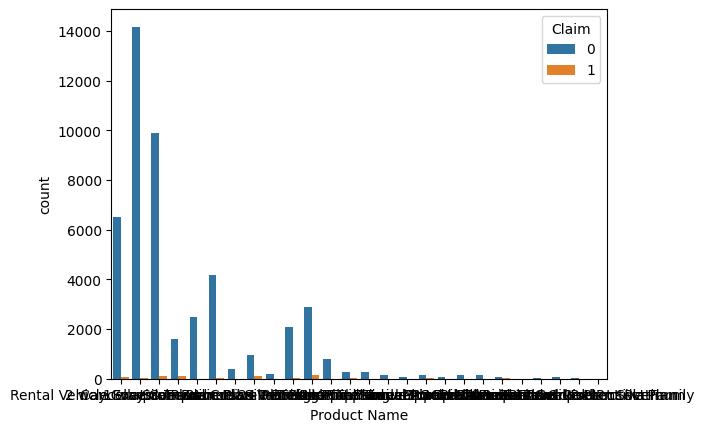

In [17]:
sb.countplot(data=df,x='Product Name',hue='Claim')

In [141]:
sns.displot(df, x='Duration',hue='Claim',kind='kde')

ValueError: Could not interpret value `Duration` for `x`. An entry with this name does not appear in `data`.

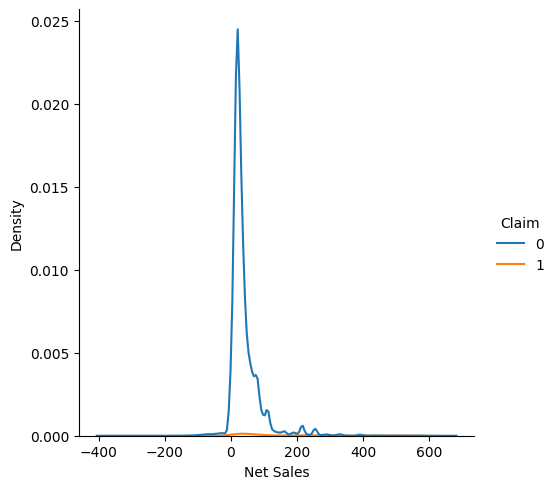

In [19]:
sns.displot(df, x='Net Sales',hue='Claim',kind='kde')

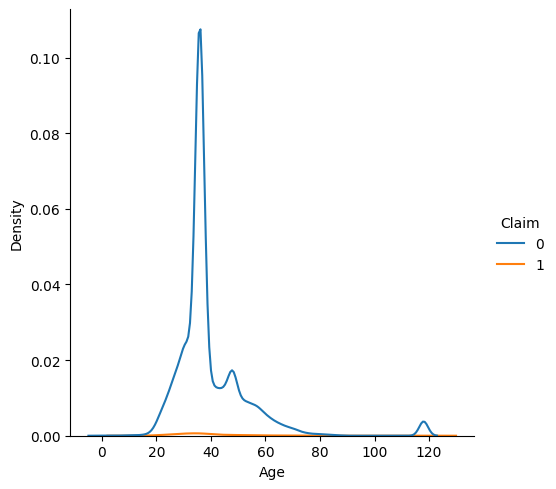

In [20]:
sns.displot(df, x='Age',hue='Claim',kind='kde')

In [21]:
df = df.drop('Destination',axis = 1)
df = df.drop('Agency',axis = 1)
df = df.drop('Product Name',axis = 1)



In [22]:
df = df.drop('Gender',axis = 1)

In [23]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder

In [24]:
le = LabelEncoder()

In [25]:
df['Agency Type'] = le.fit_transform(df['Agency Type'])

In [26]:
df['Distribution Channel'] = le.fit_transform(df['Distribution Channel'])

In [27]:
x = df.drop('Claim',axis= 1)

In [28]:
y = df['Claim']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,stratify=y,random_state=2)

In [32]:
lr = LogisticRegression(random_state=2,class_weight="balanced")

In [33]:
lr.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', random_state=2)

In [38]:
lr.score(x_test,y_test)

0.731143804392872

In [39]:
print(classification_report(y_test,lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      9510
           1       0.04      0.67      0.07       142

    accuracy                           0.73      9652
   macro avg       0.51      0.70      0.46      9652
weighted avg       0.98      0.73      0.83      9652



In [40]:
df

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Claim
0,1,1,61,19.8,11.88,29,0
1,1,1,93,63.0,0.00,36,0
2,1,1,22,22.0,0.00,25,0
3,0,1,14,54.5,13.63,24,0
4,1,1,90,10.0,0.00,23,0
...,...,...,...,...,...,...,...
48255,1,1,39,44.0,0.00,36,0
48256,0,1,20,60.0,15.00,30,0
48257,1,1,19,29.7,17.82,43,0
48258,1,1,7,20.0,0.00,61,0


In [84]:
df2 = pd.read_csv(r"D:\Downloads\insurance.csv")

In [85]:
df2

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0
...,...,...,...,...,...,...,...,...,...,...,...
48255,EPX,Travel Agency,Online,2 way Comprehensive Plan,39,CHINA,44.0,0.00,NaN,36,0
48256,C2B,Airlines,Online,Bronze Plan,20,SINGAPORE,60.0,15.00,F,30,0
48257,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,19,AUSTRALIA,29.7,17.82,NaN,43,0
48258,EPX,Travel Agency,Online,2 way Comprehensive Plan,7,INDONESIA,20.0,0.00,NaN,61,0


In [86]:
df2 = df2.drop('Gender',axis = 1)

In [80]:
oh = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [48]:
df2['Agency'] = le.fit_transform(df2['Agency'])
df2['Product Name'] = le.fit_transform(df2['Product Name'])
df2['Destination'] = le.fit_transform(df2['Destination'])
df2['Distribution Channel'] = le.fit_transform(df2['Distribution Channel'])
df2['Agency Type'] = le.fit_transform(df2['Agency Type'])

In [49]:
df2

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,6,1,1,16,61,131,19.8,11.88,29,0
1,7,1,1,10,93,90,63.0,0.00,36,0
2,7,1,1,1,22,132,22.0,0.00,25,0
3,2,0,1,17,14,112,54.5,13.63,24,0
4,7,1,1,10,90,137,10.0,0.00,23,0
...,...,...,...,...,...,...,...,...,...,...
48255,7,1,1,1,39,25,44.0,0.00,36,0
48256,2,0,1,9,20,112,60.0,15.00,30,0
48257,6,1,1,16,19,4,29.7,17.82,43,0
48258,7,1,1,1,7,56,20.0,0.00,61,0


In [50]:
u = df2.drop("Claim",axis = 1)

In [52]:
i = df2['Claim']

In [53]:
u_train,u_test,i_train,i_test = train_test_split(u,i,random_state=2,stratify=y,test_size=0.2)

In [54]:
u_train

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
27329,6,1,1,16,20,60,39.6,23.76,51
44196,9,0,1,8,55,86,30.0,10.50,44
10299,2,0,1,9,28,112,39.0,9.75,67
18946,6,1,1,16,57,4,49.5,29.70,53
4862,7,1,1,1,40,30,93.0,0.00,36
...,...,...,...,...,...,...,...,...,...
46840,7,1,1,10,1,112,10.0,0.00,36
33386,2,0,1,9,27,112,-25.2,6.30,24
32008,7,1,1,1,19,99,20.0,0.00,36
29732,7,1,1,10,3,122,10.0,0.00,33


In [55]:
lr = LogisticRegression(class_weight="balanced")

In [56]:
lr.fit(u_train,i_train)

d:\miniconda\envs\gtf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [57]:
lr.score(u_test,i_test)

0.8359925404061335

In [58]:
print(classification_report(i_test,lr.predict(u_test)))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      9510
           1       0.05      0.62      0.10       142

    accuracy                           0.84      9652
   macro avg       0.52      0.73      0.50      9652
weighted avg       0.98      0.84      0.90      9652



In [87]:
# df2['Agency'] = oh.fit_transform(df2[['Agency']])
# df2['Product Name'] = oh.fit_transform(df2[['Product Name']])
# df2['Destination'] = oh.fit_transform(df2[['Destination']])
df2['Distribution Channel'] = le.fit_transform(df2['Distribution Channel'])
df2['Agency Type'] = le.fit_transform(df2['Agency Type'])

In [88]:
df_encoded = pd.get_dummies(data=df2,columns=['Agency','Product Name','Destination'],dtype=int)

In [89]:
df_encoded

,Agency Type,Distribution Channel,Duration,Net Sales,Commision (in value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,1,1,61,19.8,11.88,29,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,1,93,63.0,0.00,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,22,22.0,0.00,25,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,14,54.5,13.63,24,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,90,10.0,0.00,23,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48255,1,1,39,44.0,0.00,36,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,0,1,20,60.0,15.00,30,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48257,1,1,19,29.7,17.82,43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48258,1,1,7,20.0,0.00,61,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
df2

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,0.0,1,1,0.0,61,0.0,19.8,11.88,29,0
1,0.0,1,1,0.0,93,0.0,63.0,0.00,36,0
2,0.0,1,1,0.0,22,0.0,22.0,0.00,25,0
3,0.0,0,1,0.0,14,0.0,54.5,13.63,24,0
4,0.0,1,1,0.0,90,0.0,10.0,0.00,23,0
...,...,...,...,...,...,...,...,...,...,...
48255,0.0,1,1,0.0,39,0.0,44.0,0.00,36,0
48256,0.0,0,1,0.0,20,0.0,60.0,15.00,30,0
48257,0.0,1,1,0.0,19,0.0,29.7,17.82,43,0
48258,0.0,1,1,0.0,7,0.0,20.0,0.00,61,0


In [75]:
df2['Destination'].unique()

array([0., 1.])

In [93]:
m = df_encoded['Claim']
n = df_encoded.drop("Claim",axis = 1)

In [94]:
n_train,n_test,m_train,m_test = train_test_split(n,m,random_state=2,stratify=y,test_size=0.2)

In [95]:
lr.fit(n_train,m_train)

d:\miniconda\envs\gtf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [96]:
lr.score(n_test,m_test)

0.7983837546622462

In [97]:
print(classification_report(m_test,lr.predict(n_test)))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      9510
           1       0.05      0.73      0.10       142

    accuracy                           0.80      9652
   macro avg       0.52      0.76      0.49      9652
weighted avg       0.98      0.80      0.87      9652



Hyper Parameter Tuning

In [100]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [99]:
df = pd.read_csv(r"D:\AIML_PROGRAM\ML\HR.csv")

In [103]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [104]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [106]:
x = df.drop(['Department','salary'],axis = 1)

In [107]:
y = df['salary']

In [108]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [111]:
df['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=11,test_size=0.2,stratify=y)

In [113]:
dtc = DecisionTreeClassifier(random_state=1)

In [114]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [132]:
params = {'criterion':['gini','entropy'],'max_depth':[3,4,7,8,9],'min_samples_split':[2,3],'class_weight':[None,'balanced']}

In [116]:
gs = GridSearchCV(dtc,param_grid=params,cv=5,verbose = 1,n_jobs=-1)

In [117]:
gs.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 7, 8, 9],
                         'min_samples_split': [2, 3]},
             verbose=1)

In [118]:
gs.best_score_

0.5125426566624982

In [119]:
gs.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_split': 3}

In [126]:
params = {'tol':[0.000123,0.000145,0.00056,0.000195],'C':[1.0,1.2,1.5,1.8,1.9],'solver':['lbfgs', 'liblinear','newton-cg', 'newton-cholesky', 'sag', 'saga'],'class_weight':[None,'balanced']}

In [127]:
gs = GridSearchCV(lr,param_grid=params,cv=3,verbose = 1,n_jobs=-1)

In [128]:
gs.fit(x_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


d:\miniconda\envs\gtf\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [1.0, 1.2, 1.5, 1.8, 1.9],
                         'class_weight': [None, 'balanced'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': [0.000123, 0.000145, 0.00056, 0.000195]},
             verbose=1)

In [129]:
gs.best_score_

0.5044591564557807

In [130]:
gs.best_params_

{'C': 1.9, 'class_weight': None, 'solver': 'lbfgs', 'tol': 0.000123}

using randomized search cv

In [133]:
rs= RandomizedSearchCV(dtc,param_distributions=params,cv=5,verbose = 1,n_jobs=-1)

In [134]:
rs.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 7, 8, 9],
                                        'min_samples_split': [2, 3]},
                   verbose=1)

In [135]:
rs.best_params_

{'min_samples_split': 2,
 'max_depth': 9,
 'criterion': 'gini',
 'class_weight': None}

do eda
use smote to handle class imbalance 
check f1 score
try ensemble algoritms to fit 

TASK

In [136]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [139]:
tdf = pd.read_csv(r"D:\AIML_PROGRAM\ML\HR.csv")

In [148]:
tdf

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [144]:
tdf["left"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='Department', ylabel='count'>

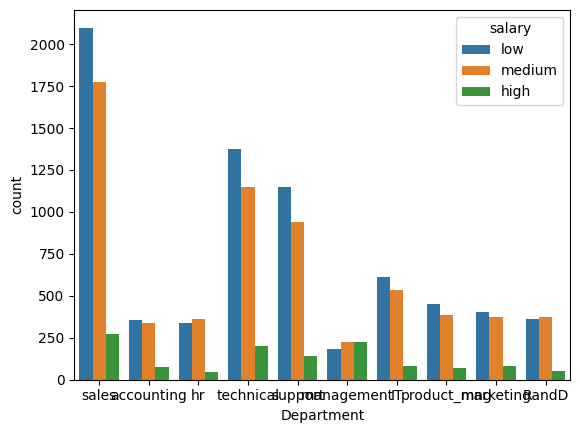

In [155]:
sns.countplot(data=df,x='Department',hue='salary')

<Axes: xlabel='number_project', ylabel='count'>

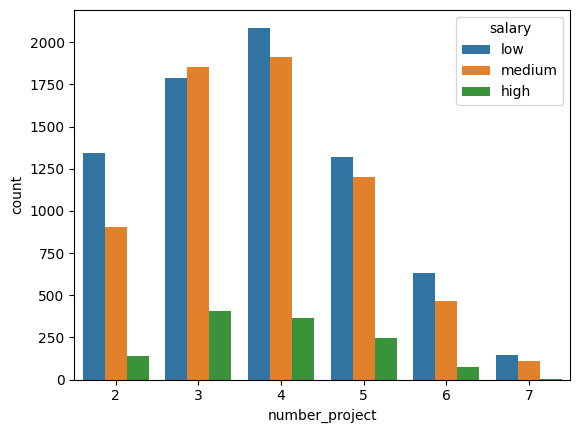

In [145]:
sns.countplot(data=df,x='number_project',hue='salary')

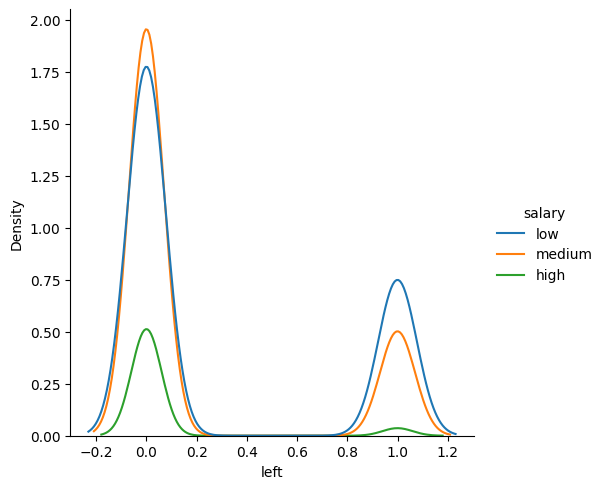

In [154]:
sns.displot(df, x='left',hue='salary',kind='kde')

In [ ]:
oe = OrdinalEncoder(categories=[['low','medium','high']])
tdf['left'] = oe.fit(tdf['left'])

In [150]:
le = LabelEncoder()

In [151]:
tdf['salary'] = le.fit_transform(tdf['salary'])

In [159]:
tdf = tdf.drop('Department',axis = 1)

In [165]:
x = tdf.drop('left',axis = 1)
y = tdf['left']

In [168]:
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


splitting dataset

In [166]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2,stratify = y)

feature selsection 

In [169]:
kbest = SelectKBest(k = 5,score_func=mutual_info_classif)

In [170]:
kbest.fit(x_train,y_train)

SelectKBest(k=5,
            score_func=<function mutual_info_classif at 0x0000027ED20DA940>)

In [171]:
x_train_new = kbest.transform(x_train)

In [172]:
x_test_new = kbest.transform(x_test)

handling class imbalance

In [173]:
from imblearn.over_sampling import SMOTE,KMeansSMOTE,SVMSMOTE

In [176]:
sm = SMOTE(sampling_strategy='auto', random_state=2)

In [177]:
x_resampled,y_resampled = sm.fit_resample(x_train_new,y_train)

In [179]:
y_resampled.value_counts()

salary
1    5853
2    5853
0    5853
Name: count, dtype: int64

In [180]:
gs.fit(x_resampled,y_resampled)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


GridSearchCV(cv=3, estimator=LogisticRegression(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'C': [1.0, 1.2, 1.5, 1.8, 1.9],
                         'class_weight': [None, 'balanced'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'tol': [0.000123, 0.000145, 0.00056, 0.000195]},
             verbose=1)

In [181]:
gs.best_score_

0.4137479355316362

In [182]:
gs.best_params_

{'C': 1.2,
 'class_weight': 'balanced',
 'solver': 'newton-cholesky',
 'tol': 0.000123}

In [183]:
print(classification_report(y_test,gs.predict(x_test_new)))

              precision    recall  f1-score   support

           0       0.10      0.73      0.18       248
           1       0.60      0.30      0.40      1463
           2       0.41      0.17      0.24      1289

    accuracy                           0.28      3000
   macro avg       0.37      0.40      0.27      3000
weighted avg       0.48      0.28      0.31      3000



In [35]:
import pandas as pd
import numpy as np 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [23]:
df = pd.read_csv(r"loan_data.csv")

In [24]:
x = df.drop('Loan_Status',axis=1)

In [25]:
y = df["Loan_Status"]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=12,test_size=0.2,stratify=y)

In [27]:
enc = OneHotEncoder(drop = "first",handle_unknown='ignore')
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_pipe = Pipeline(steps=[('cat_imputer',cat_imputer),('encoder',enc)])

In [28]:
num_imputer = SimpleImputer(strategy='median') 
scaler = RobustScaler()
num_pipe = Pipeline(steps=[('num_imputer',num_imputer),('scaler',scaler)]) 


In [29]:
ct = ColumnTransformer(transformers = [('cat_trans',cat_pipe,[0,1,2,3,4,9,10]),('num_trans',num_pipe,[5,6,7,8])] ,remainder='passthrough')

In [30]:
model = Pipeline(steps=[('trandformers',ct),('estimator',LogisticRegression(max_iter=10000))])

In [31]:
model.fit(x_train,y_train)

Pipeline(steps=[('trandformers',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_trans',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 9, 10]),
                                                 ('num_trans',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  [5, 6, 7, 8])])),
                ('estimator', LogisticRegression(max_iter=10000))])

In [32]:
model.predict(x_test)

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0], dtype=int64)

In [33]:
model.score(x_test,y_test)

0.8181818181818182

In [36]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        30
           1       0.80      0.99      0.88        69

    accuracy                           0.82        99
   macro avg       0.86      0.71      0.74        99
weighted avg       0.84      0.82      0.79        99

